In [31]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
a = fits.open('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_selfshield_z15_DD0600_momentum.fits')

In [129]:
ms_s = a['STAR_MASS'].data
age_s = a['STAR_AGE'].data

id_s = a['STARS_ID'].data
rd_s = sqrt(sum(a['STARS_GAL_POSITION'].data**2., axis = 0))
x_s, y_s, z_s = a['STARS_GAL_POSITION'].data
vx_s, vy_s, vz_s = a['STARS_GAL_VELOCITY'].data

x_s_box, y_s_box, z_s_box = a['STARS_BOX_POSITION'].data
vx_s_box, vy_s_box, vz_s_box = a['STARS_BOX_VELOCITY'].data



ep_s = a['STARS_EPSILON_FIXED'].data

ms_d = a['DARK_MASS'].data
rd_d = sqrt(sum(a['DARK_GAL_POSITION'].data**2., axis = 0))
x_d, y_d, z_d = a['DARK_GAL_POSITION'].data
vx_d, vy_d, vz_d = a['DARK_GAL_VELOCITY'].data

ep_d = a['DARK_EPSILON_FIXED'].data



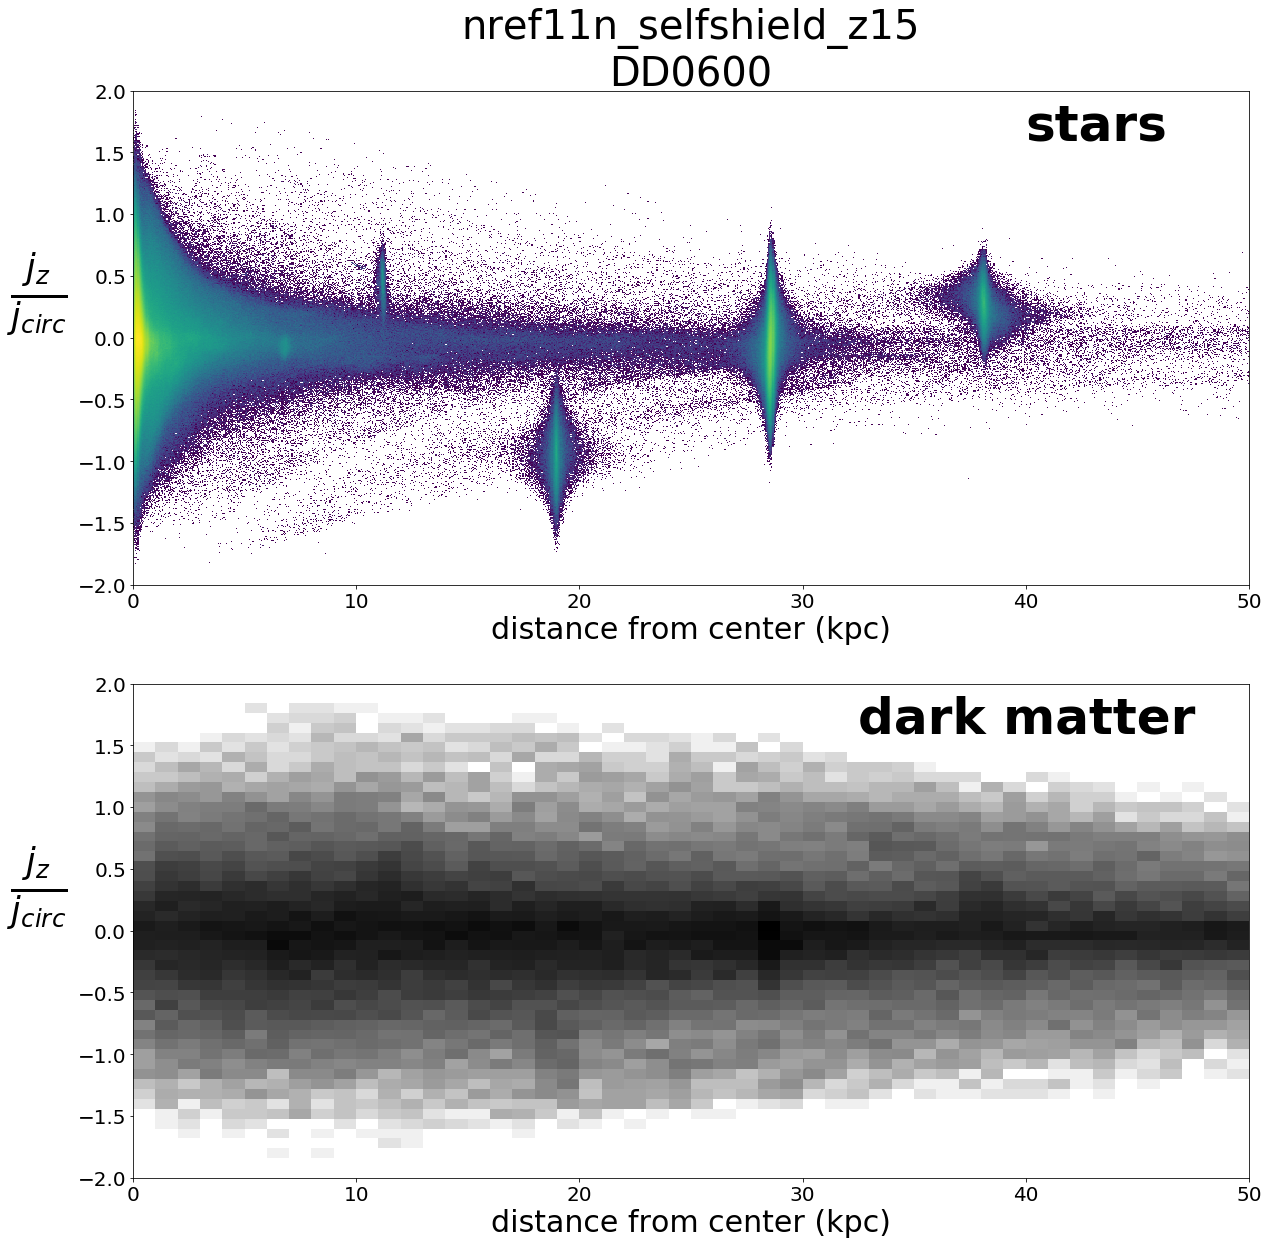

In [61]:
fig, axes = plt.subplots(2,1, figsize = (20,20))
axes[0].hist2d(rd_s, ep_s, range = ([0, 50], [-2,2]), norm = mpl.colors.LogNorm(), cmap = mpl.cm.viridis, bins = 1000)
axes[1].hist2d(rd_d, ep_d, range = ([0, 50], [-2,2]), norm = mpl.colors.LogNorm(), cmap = mpl.cm.Greys, bins = 50)

axes[0].set_title('nref11n_selfshield_z15\nDD0600', fontsize = 40)
axes[0].annotate('stars', (0.8, 0.9), xycoords = 'axes fraction', fontsize = 50, fontweight = 'bold')
axes[1].annotate('dark matter', (0.65, 0.9), xycoords = 'axes fraction', fontsize = 50, fontweight = 'bold')


for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('distance from center (kpc)', fontsize = 30)
    ax.set_ylabel(r'$\frac{j_{z}}{j_{circ}}$', fontsize = 50, labelpad = 40, rotation = 0)


In [90]:
mn_r = 27
mx_r = 30

in_sel = (rd_s > mn_r) & (rd_s < mx_r)
in_sel_age = (rd_s > mn_r) & (rd_s < mx_r) & (age_s > 2.e9)

Text(0,0.5,'$\\frac{j_{z}}{j_{circ}}$')

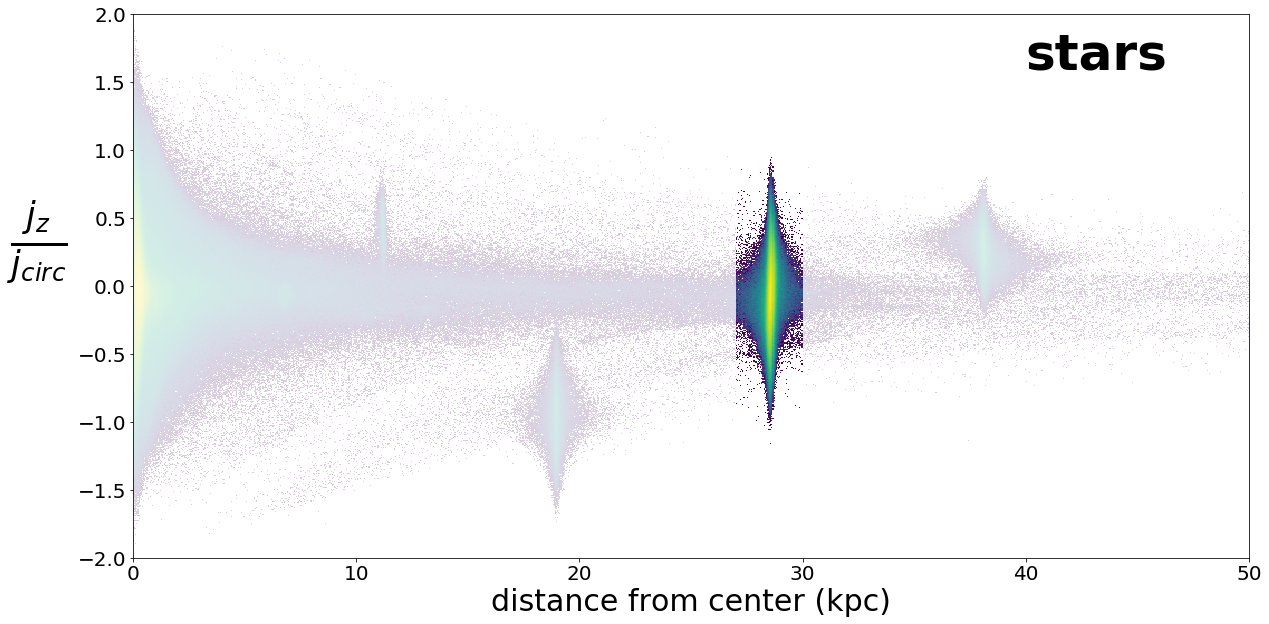

In [91]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.hist2d(rd_s, ep_s, range = ([0, 50], [-2,2]), norm = mpl.colors.LogNorm(), cmap = mpl.cm.viridis, bins = 1000, alpha = 0.2)

ax.hist2d(rd_s[in_sel], ep_s[in_sel], range = ([0, 50], [-2,2]), norm = mpl.colors.LogNorm(), cmap = mpl.cm.viridis, bins = 1000)



ax.annotate('stars', (0.8, 0.9), xycoords = 'axes fraction', fontsize = 50, fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('distance from center (kpc)', fontsize = 30)
ax.set_ylabel(r'$\frac{j_{z}}{j_{circ}}$', fontsize = 50, labelpad = 40, rotation = 0)




In [95]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = numpy.average(values, weights=weights)
    # Fast and numerically precise:
    variance = numpy.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

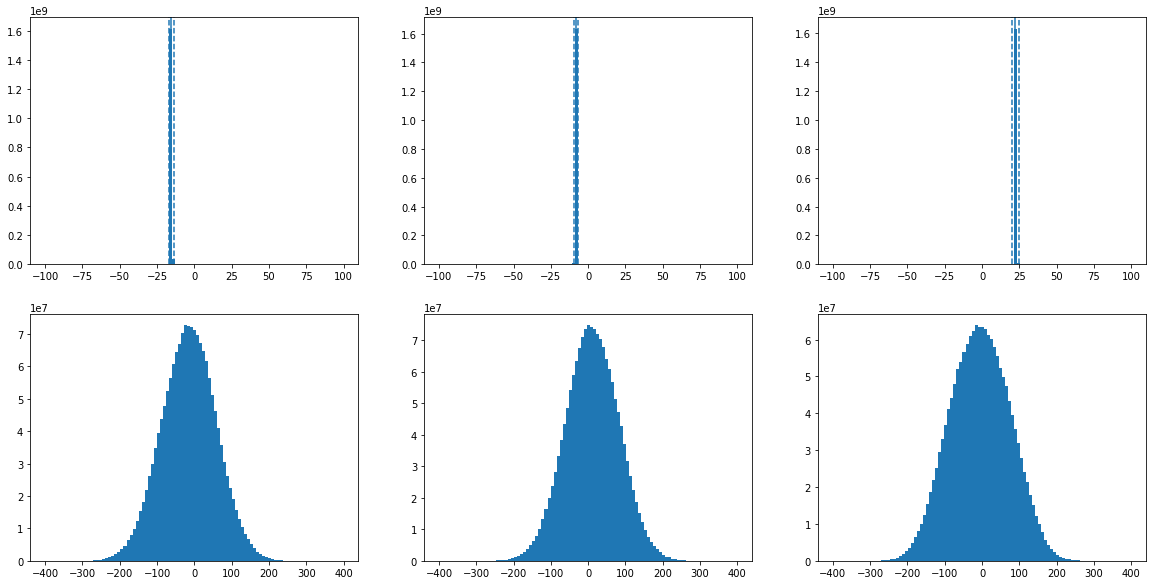

In [103]:
fig, axes = plt.subplots(2,3, figsize = (20, 10))

x_s_avg, x_s_std = weighted_avg_and_std(x_s[in_sel], weights = ms_s[in_sel])
y_s_avg, y_s_std = weighted_avg_and_std(y_s[in_sel], weights = ms_s[in_sel])
z_s_avg, z_s_std = weighted_avg_and_std(z_s[in_sel], weights = ms_s[in_sel])



x_hist = axes[0,0].hist(x_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))
y_hist = axes[0,1].hist(y_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))
z_hist = axes[0,2].hist(z_s[in_sel], weights = ms_s[in_sel], bins = linspace(-100, 100, 100))


axes[0,0].axvline(x = x_s_avg)
axes[0,0].axvline(x = x_s_avg + x_s_std, linestyle = 'dashed')
axes[0,0].axvline(x = x_s_avg - x_s_std, linestyle = 'dashed')

axes[0,1].axvline(x = y_s_avg)
axes[0,1].axvline(x = y_s_avg + y_s_std, linestyle = 'dashed')
axes[0,1].axvline(x = y_s_avg - y_s_std, linestyle = 'dashed')

axes[0,2].axvline(x = z_s_avg)
axes[0,2].axvline(x = z_s_avg + z_s_std, linestyle = 'dashed')
axes[0,2].axvline(x = z_s_avg - z_s_std, linestyle = 'dashed')


vx_hist = axes[1,0].hist(vx_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))
vy_hist = axes[1,1].hist(vy_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))
vz_hist = axes[1,2].hist(vz_s[in_sel], weights = ms_s[in_sel], bins = linspace(-400, 400, 100))





In [132]:
good       = where((abs(x_s[in_sel] - x_s_avg) < 3 * x_s_std) & 
                   (abs(y_s[in_sel] - y_s_avg) < 3 * y_s_std) & 
                   (abs(z_s[in_sel] - z_s_avg) < 3 * z_s_std))[0]

good_ids  = id_s[in_sel][good]
good_ages = age_s[in_sel][good]
good_rds = rd_s[in_sel][good]
good_eps = ep_s[in_sel][good]
good_mss = ms_s[in_sel][good]
good_xs = x_s[in_sel][good]
good_ys = y_s[in_sel][good]
good_zs = z_s[in_sel][good]
good_vxs = vx_s[in_sel][good]
good_vys = vy_s[in_sel][good]
good_vzs = vz_s[in_sel][good]

good_xs_box = x_s_box[in_sel][good]
good_ys_box = y_s_box[in_sel][good]
good_zs_box = z_s_box[in_sel][good]
good_vxs_box = vx_s_box[in_sel][good]
good_vys_box = vy_s_box[in_sel][good]
good_vzs_box = vz_s_box[in_sel][good]






anchor_ids  = good_ids[argsort(good_ages)[::-1][0:1000]].astype('int')
anchor_ages = good_ages[argsort(good_ages)[::-1][0:1000]]
anchor_rds  = good_rds[argsort(good_ages)[::-1][0:1000]]
anchor_eps  = good_eps[argsort(good_ages)[::-1][0:1000]]
anchor_mss  = good_mss[argsort(good_ages)[::-1][0:1000]]

anchor_xs    = good_xs[argsort(good_ages)[::-1][0:1000]]
anchor_ys    = good_ys[argsort(good_ages)[::-1][0:1000]]
anchor_zs    = good_zs[argsort(good_ages)[::-1][0:1000]]
anchor_vxs  = good_vxs[argsort(good_ages)[::-1][0:1000]]
anchor_vys  = good_vys[argsort(good_ages)[::-1][0:1000]]
anchor_vzs  = good_vzs[argsort(good_ages)[::-1][0:1000]]



anchor_xs_box    = good_xs_box[argsort(good_ages)[::-1][0:1000]]
anchor_ys_box    = good_ys_box[argsort(good_ages)[::-1][0:1000]]
anchor_zs_box    = good_zs_box[argsort(good_ages)[::-1][0:1000]]
anchor_vxs_box  = good_vxs_box[argsort(good_ages)[::-1][0:1000]]
anchor_vys_box  = good_vys_box[argsort(good_ages)[::-1][0:1000]]
anchor_vzs_box  = good_vzs_box[argsort(good_ages)[::-1][0:1000]]







anchor_xs_box_avg, _  = weighted_avg_and_std(anchor_xs_box, weights = anchor_mss)
anchor_ys_box_avg, _  = weighted_avg_and_std(anchor_ys_box, weights = anchor_mss)
anchor_zs_box_avg, _  = weighted_avg_and_std(anchor_zs_box, weights = anchor_mss)
anchor_vxs_box_avg, _ = weighted_avg_and_std(anchor_vxs_box, weights = anchor_mss)
anchor_vys_box_avg, _ = weighted_avg_and_std(anchor_vys_box, weights = anchor_mss)
anchor_vzs_box_avg, _ = weighted_avg_and_std(anchor_vzs_box, weights = anchor_mss)








In [133]:
print 'anchor_xs_box_avg' , anchor_xs_box_avg
print 'anchor_ys_box_avg' , anchor_ys_box_avg
print 'anchor_zs_box_avg' , anchor_zs_box_avg
print 'anchor_vxs_box_avg', anchor_vxs_box_avg
print 'anchor_vys_box_avg', anchor_vys_box_avg
print 'anchor_vzs_box_avg', anchor_vzs_box_avg









anchor_xs_box_avg 26565.02824535723
anchor_ys_box_avg 26235.2629695309
anchor_zs_box_avg 27092.965593446683
anchor_vxs_box_avg -54.92350698652206
anchor_vys_box_avg -122.25152029118843
anchor_vzs_box_avg 54.24515875212547


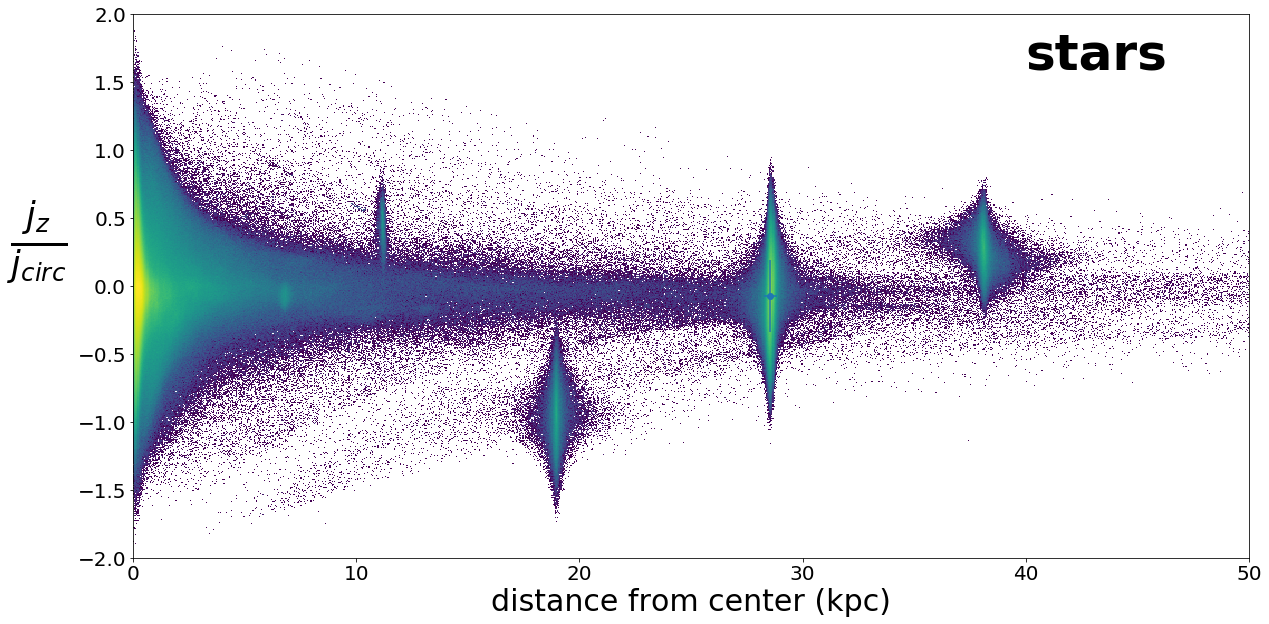

In [125]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.hist2d(rd_s, ep_s, range = ([0, 50], [-2,2]), norm = mpl.colors.LogNorm(), cmap = mpl.cm.viridis, bins = 1000, alpha = 1.0)


avg_r, std_r = weighted_avg_and_std(anchor_rds, weights = anchor_mss)
avg_e, std_e = weighted_avg_and_std(anchor_eps, weights = anchor_mss)



ax.errorbar(avg_r, avg_e, xerr = std_r, yerr = std_e, marker = 'o')


ax.annotate('stars', (0.8, 0.9), xycoords = 'axes fraction', fontsize = 50, fontweight = 'bold')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('distance from center (kpc)', fontsize = 30)
ax.set_ylabel(r'$\frac{j_{z}}{j_{circ}}$', fontsize = 50, labelpad = 40, rotation = 0)




np.save('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_selfshield_z15_anchors.npy', anchor_ids)




In [126]:
anchor_ids = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/nref11n_selfshield_z15_anchors.npy')[()]

yt : [INFO     ] 2018-10-18 22:27:08,081 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-10-18 22:27:08,083 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-10-18 22:27:08,084 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-10-18 22:27:08,086 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-10-18 22:27:08,088 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-10-18 22:27:08,089 Parameters: current_redshift          = 1.67203863787
yt : [INFO     ] 2018-10-18 22:27:08,091 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-10-18 22:27:08,092 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-10-18 22:27:08,094 Parameters: hubble_constant           = 0.695


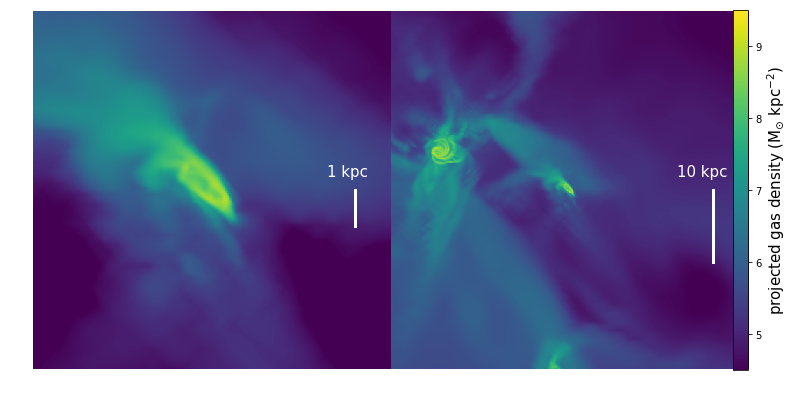

In [174]:
import yt
import os
os.chdir('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/DD0600/')
ds = yt.load('DD0600')
cen = yt.YTArray([anchor_xs_box_avg, anchor_ys_box_avg, anchor_zs_box_avg], 'kpc')


vel_vec = array([anchor_vxs_box_avg, anchor_vys_box_avg, anchor_vzs_box_avg])
L = vel_vec/np.linalg.norm(vel_vec)


W1 = yt.YTArray([10, 10, 10], 'kpc')
W2 = yt.YTArray([50, 50, 50], 'kpc')

north_vector = [0,1,0]
N = 512

image1 = yt.off_axis_projection(ds, cen, L, W1, N, ('gas', 'density'), north_vector =  north_vector)
image2 = yt.off_axis_projection(ds, cen, L, W2, N, ('gas', 'density'), north_vector =  north_vector)


fig, axes = subplots(1,2, figsize = (10.8, 5))


image1 = image1.in_units('Msun * kpc**-2')
image2 = image2.in_units('Msun * kpc**-2')

im1 = axes[0].imshow(np.log10(image1), vmin = 4.5, vmax = 9.5)
im2 = axes[1].imshow(np.log10(image2), vmin = 4.5, vmax = 9.5)

bar_len_kpc = 1.
bar_len_pix = 1.*N/W1[0].value * bar_len_kpc
y_bar_start_pix = 0.5*N
y_bar_end_pix = y_bar_start_pix + bar_len_pix
x_bar_pix = 0.9*N
axes[0].plot([x_bar_pix, x_bar_pix], [y_bar_start_pix, y_bar_end_pix], color = 'white', linewidth = 3)
axes[0].annotate("%i kpc"%bar_len_kpc, (x_bar_pix-0.08*N, y_bar_start_pix- 0.04*N), color = 'white', fontsize = 15, rotation = 0)



bar_len_kpc = 10
bar_len_pix = 1.*N/W2[0].value * bar_len_kpc
y_bar_start_pix = 0.5*N
y_bar_end_pix = y_bar_start_pix + bar_len_pix
x_bar_pix = 0.9*N
axes[1].plot([x_bar_pix, x_bar_pix], [y_bar_start_pix, y_bar_end_pix], color = 'white', linewidth = 3)
axes[1].annotate("%i kpc"%bar_len_kpc, (x_bar_pix-0.10*N, y_bar_start_pix- 0.04*N), color = 'white', fontsize = 15, rotation = 0)






for ax in axes:
    ax.axis('off')

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")
cbr.set_label('projected gas density (M$_{\odot}$ kpc$^{-2}$)', fontsize = 15)
fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)
